In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from utils import utils
from utils import dbm_math

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
data1 = utils.read_mat('/home/matthias/WS_all/dbm/raw/exam/ex1_data.mat')
data2 = utils.read_mat('/home/matthias/WS_all/dbm/raw/exam/ex1_data.mat')

display(data1.keys())
display(data2.keys())

dict_keys(['para', 't', 'u', 'y'])

dict_keys(['para', 't', 'u', 'y'])

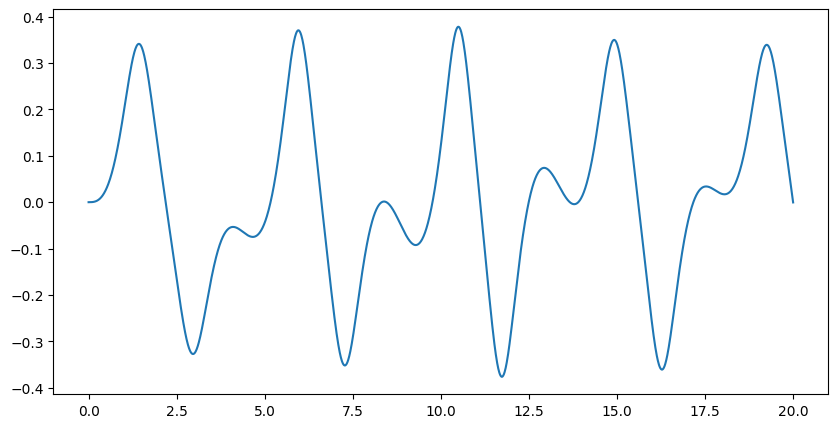

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(data1.t,data1.y)
plt.show()

In [ ]:
na = 2
nb = 3


k = data1.y.shape[0]

p,P = dbm_math.arx_fit(na,nb,data1.y,data1.u)

p, loss, na,nb = dbm_math.arx_optimizer(data1.y,data1.u,(1,20),(1,20))


Testing 361 combinations.
Progress: 0.28 %
Current iteration: 1 / 361
Iteration took 0.01 seconds, average 0.00 seconds
Progress: 27.98 %
Current iteration: 101 / 361
Iteration took 0.00 seconds, average 0.00 seconds
Progress: 55.68 %
Current iteration: 201 / 361
Iteration took 0.00 seconds, average 0.00 seconds
Progress: 83.38 %
Current iteration: 301 / 361
Iteration took 0.00 seconds, average 0.00 seconds


In [ ]:
display(p, loss)
display(na,nb)

Array([ 1.9993813e+00, -1.0001903e+00,  1.9768615e-05,  6.6472567e-05,
        1.5300542e-05, -1.6182177e-05, -2.8529854e-05, -4.4955214e-05,
       -3.2037155e-05, -1.6428912e-05, -3.0638603e-06, -1.5191307e-06,
        8.7237058e-06,  3.1518415e-05,  3.4134940e-04, -2.0785401e-04],      dtype=float32)

Array(0.0482943, dtype=float32)

2

13

In [ ]:
y_out = dbm_math.arx_sim(jnp.array([0]), data1.u,na, nb, p.flatten())

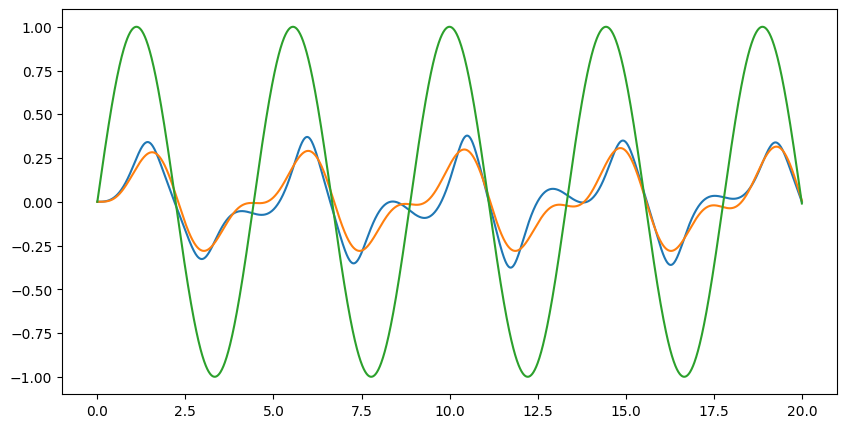

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data1.t, data1.y, label='data')
plt.plot(data1.t, y_out, label='model')
plt.plot(data1.t, data1.u, label='input')
plt.show()

# Hammerstein


In [ ]:
hp = dbm_math.hammerstein_optimization(data1.y,data1.u,(1,2), (5,7), (4,5), (2,4), (0.1,0.9))

Total parameters: 800
Progress: 0.12 %
Current iteration time: 0.42s, average: 0.21 seconds
Progress: 12.62 %
Current iteration time: 0.37s, average: 0.37 seconds


: 

In [ ]:
params, loss, func, order, na, nb = hp
display(params, loss)
display(func, order, na, nb)

Array([ 1.7684610e+00, -8.4965068e-01,  1.3848282e-02, -2.0249715e-02,
        1.7324187e-03, -1.1676620e-02, -1.7322173e-02,  4.7063208e-03,
        1.8018208e-02, -3.0523410e-02,  5.0383016e-02, -3.6099702e-02,
       -4.5022074e-02, -6.3109733e-02, -4.2087447e-02, -9.0116402e-03,
       -1.5386288e-02,  3.6113173e-02,  7.4520133e-02,  9.9245757e-02,
        2.6611745e-02,  2.6353598e-02,  2.7204916e-02,  2.2820497e-02,
        9.6442411e-03, -1.2199949e-02, -5.6129219e-03, -5.9606634e-02,
       -2.3358693e-02, -3.7681658e-02, -3.2550279e-02,  1.0652150e-02,
        4.4575155e-02, -2.6379248e-02,  3.2501489e-02, -1.2304610e-02,
        2.2645721e-03,  6.2791710e-03,  9.2826243e-03, -1.2002496e-02,
        7.9431040e-03,  2.5644135e-03, -3.0839905e-02, -1.2503337e-02,
       -4.4779773e-03,  1.1039483e-02,  2.5494885e-02,  1.4918153e-01,
        4.1350361e-02, -2.5561286e-02, -1.2872858e-01, -5.6622297e-02,
       -1.3578233e-01, -4.7223244e-02,  4.7931481e-02,  1.7484920e-01],      

Array(0.04197946, dtype=float32)

functools.partial(<PjitFunction of <function _polynomial at 0x79275e938720>>, array=Array([0.5      , 0.1      , 0.6999999], dtype=float32))

6

2

8

In [ ]:
yh_out = dbm_math.hammerstein_sim(jnp.array([0]), data1.u,na,nb, order, func, params)

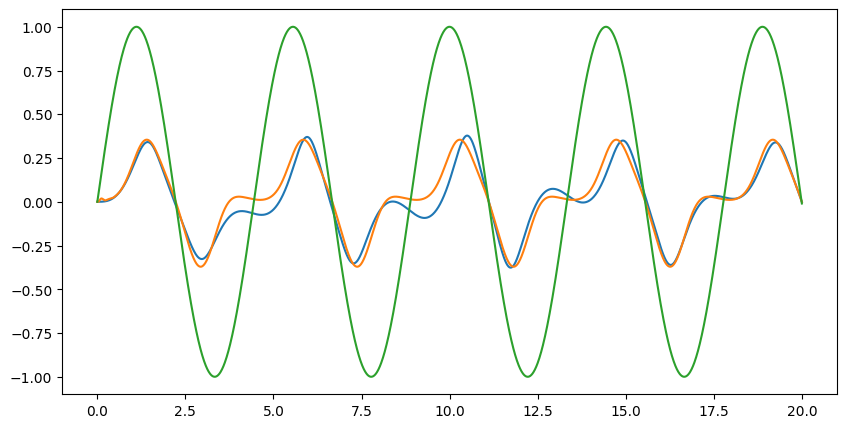

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data1.t, data1.y, label='data')
plt.plot(data1.t, yh_out, label='model')
plt.plot(data1.t, data1.u, label='input')
plt.show()